In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline


In [ ]:
df=pd.read_csv("/content/Bengaluru_House_Data.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
df=df.drop(columns=['availability','society','balcony'])

In [ ]:
df=df.drop(columns=['area_type'])

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df['bedrooms']=df['size'].apply(lambda x: int(x.split(" ")[0]))

In [ ]:
df.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [ ]:
df['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df[df['bedrooms']>20]

,location,size,total_sqft,bath,price,bedrooms
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df[df['bedrooms']<20]

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [ ]:
df['bedrooms'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
def convert_num(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return (float(tokens[0])+float(tokens[1]))/2
  try:
    return float(x)
  except:
    return None

In [ ]:
df1=df.copy()#making a copy of data just in case dataframe is harmed
df1.total_sqft=df1.total_sqft.apply(convert_num)
df1.dropna(inplace=True)
df1.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13200 non-null  object 
 1   size        13200 non-null  object 
 2   total_sqft  13200 non-null  float64
 3   bath        13200 non-null  float64
 4   price       13200 non-null  float64
 5   bedrooms    13200 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   size        13246 non-null  object 
 2   total_sqft  13246 non-null  object 
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
 5   bedrooms    13246 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 724.4+ KB


In [ ]:
df1['total_sqft'].describe()

count    13200.000000
mean      1555.302783
std       1237.323445
min          1.000000
25%       1100.000000
50%       1275.000000
75%       1672.000000
max      52272.000000
Name: total_sqft, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7faf204c3b50>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf205080d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faf204c39d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf20508610>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf205088b0>],
 'means': []}

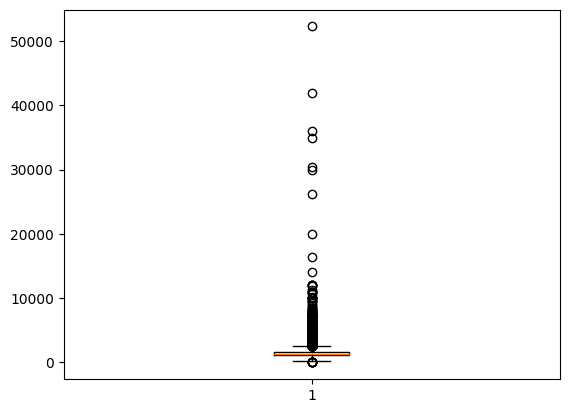

In [ ]:
plt.boxplot(df1['total_sqft'])

In [ ]:
low, high = df1["total_sqft"].quantile([0.1,0.9])
mask_area = df1["total_sqft"].between(low,high)
df1 = df1[mask_area]

{'whiskers': [<matplotlib.lines.Line2D at 0x7faf1e3d38e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf1e3d3e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faf1e3d3760>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf1e40c3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf1e40c640>],
 'means': []}

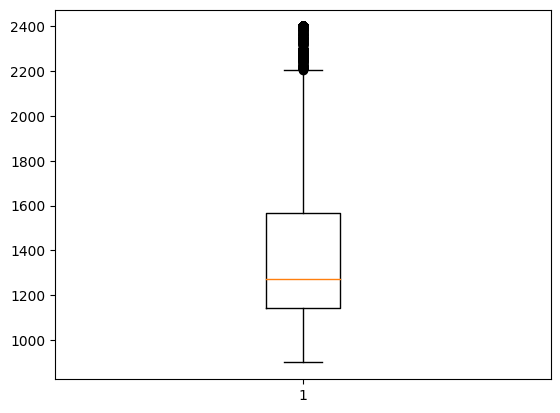

In [ ]:
plt.boxplot(df1["total_sqft"])

In [ ]:
df1["bath"].describe()

count    10594.000000
mean         2.556069
std          1.088512
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         40.000000
Name: bath, dtype: float64

In [ ]:
df1["bath"].value_counts()

2.0     6468
3.0     2933
4.0      632
5.0      190
1.0      135
6.0      117
7.0       46
8.0       31
9.0       22
10.0       9
12.0       3
11.0       3
16.0       1
40.0       1
15.0       1
13.0       1
18.0       1
Name: bath, dtype: int64

In [ ]:
df1['bath'].value_counts()

2.0     6468
3.0     2933
4.0      632
5.0      190
1.0      135
6.0      117
7.0       46
8.0       31
9.0       22
10.0       9
12.0       3
11.0       3
16.0       1
40.0       1
15.0       1
13.0       1
18.0       1
Name: bath, dtype: int64

In [ ]:
df1=df1[df1['bath']<12]

In [ ]:
df1['bath'].value_counts()

2.0     6468
3.0     2933
4.0      632
5.0      190
1.0      135
6.0      117
7.0       46
8.0       31
9.0       22
10.0       9
11.0       3
Name: bath, dtype: int64

In [ ]:
df1.head()

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2


In [ ]:
df1['location'].value_counts()

Whitefield               411
Sarjapur  Road           320
Electronic City          242
Kanakpura Road           218
Thanisandra              205
                        ... 
Maruthi Extension          1
Okalipura                  1
Vasantapura main road      1
Bapuji Layout              1
Annaiah Reddy Layout       1
Name: location, Length: 1122, dtype: int64

In [ ]:
df1.location = df1.location.apply(lambda x : x.strip())
location_stats = df1['location'].value_counts(ascending=False)
location_stats

<ipython-input-34-5911e4152b4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.location = df1.location.apply(lambda x : x.strip())


Whitefield                                  412
Sarjapur  Road                              320
Electronic City                             242
Kanakpura Road                              218
Thanisandra                                 205
                                           ... 
Ganesha Block                                 1
Garden Layout                                 1
Viswapriyanagar.begur Road.bommanahalli.      1
T K Reddy Layout                              1
Annaiah Reddy Layout                          1
Name: location, Length: 1119, dtype: int64

In [ ]:
location_stats_less_than_10 = location_stats[location_stats<=10]
len(location_stats_less_than_10)

922

In [ ]:
df1.location.nunique()

1119

In [ ]:
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df1.location.unique())

<ipython-input-37-69c2440bc095>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)


198

In [ ]:
df1.head(10)

,location,size,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6
10,Whitefield,3 BHK,1800.0,2.0,70.00,3
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2
13,Gottigere,2 BHK,1100.0,2.0,40.00,2


In [ ]:
df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']

<ipython-input-39-cd4a0dd79e85>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_sqft']=df1['price']*100000/df1['total_sqft']


In [ ]:
df1['price_per_sqft'].describe()

count    10586.000000
mean      6244.315309
std       3698.326765
min        500.000000
25%       4206.709513
50%       5252.421226
75%       6761.335502
max      53150.000000
Name: price_per_sqft, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7faf1e45ff70>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf1e490460>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faf1e45fcd0>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf1e4909a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf1e490c40>],
 'means': []}

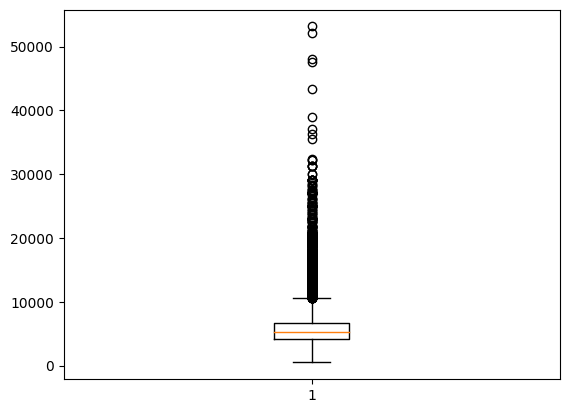

In [ ]:
plt.boxplot(df1["price_per_sqft"])

In [ ]:
low, high = df1["price_per_sqft"].quantile([0.1,0.9])
mask_area = df1["price_per_sqft"].between(low,high)
df1 = df1[mask_area]

{'whiskers': [<matplotlib.lines.Line2D at 0x7faf1e2d6710>,
 'caps': [<matplotlib.lines.Line2D at 0x7faf1e2d6c50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faf1e2d6470>],
 'medians': [<matplotlib.lines.Line2D at 0x7faf1e2d7190>],
 'fliers': [<matplotlib.lines.Line2D at 0x7faf1e2d7430>],
 'means': []}

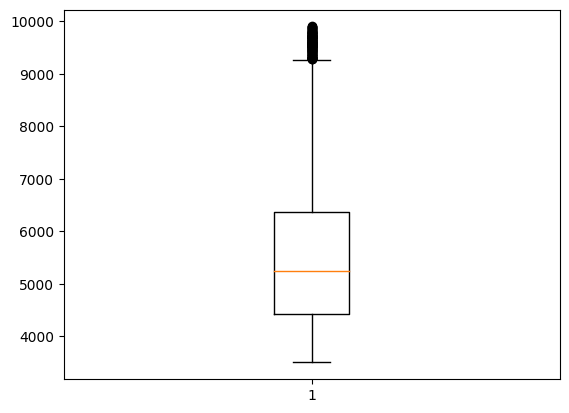

In [ ]:
plt.boxplot(df1["price_per_sqft"])

In [ ]:
df1['price_per_sqft'].describe()

count    8468.000000
mean     5525.927314
std      1399.739284
min      3500.408831
25%      4422.310757
50%      5252.421226
75%      6364.809866
max      9904.371585
Name: price_per_sqft, dtype: float64

In [ ]:
df1.head(10)

,location,size,total_sqft,bath,price,bedrooms,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
10,Whitefield,3 BHK,1800.0,2.0,70.00,3,3888.888889
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,38.00,2,3800.000000
13,Gottigere,2 BHK,1100.0,2.0,40.00,2,3636.363636
14,Sarjapur,3 Bedroom,2250.0,3.0,148.00,3,6577.777778
15,Mysore Road,2 BHK,1175.0,2.0,73.50,2,6255.319149


In [ ]:
df1=df1.drop(columns=['size', 'price_per_sqft'])

In [ ]:
df1.head(10)

,location,total_sqft,bath,price,bedrooms
0,Electronic City Phase II,1056.0,2.0,39.07,2
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
8,Marathahalli,1310.0,3.0,63.25,3
10,Whitefield,1800.0,2.0,70.00,3
12,7th Phase JP Nagar,1000.0,2.0,38.00,2
13,Gottigere,1100.0,2.0,40.00,2
14,Sarjapur,2250.0,3.0,148.00,3
15,Mysore Road,1175.0,2.0,73.50,2


In [ ]:
X = df1.drop(['price'],axis='columns')

In [ ]:
y = df1.price

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [ ]:
!pip install category_encoders
from category_encoders import OneHotEncoder

In [ ]:
model = make_pipeline(
    OneHotEncoder(),
    Ridge()
)

model.fit(X_train,y_train)


Pipeline(steps=[('onehotencoder', OneHotEncoder(cols=['location'])),
                ('ridge', Ridge())])

In [ ]:
y_pred = model.predict(X_train)
mae = mean_absolute_error(y_train,y_pred)
mae

12.853342481379553

In [ ]:
y_train.mean()

77.7430742545025

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error as error
mae = error(y_train,y_pred)
mae


0.1697594051573395

In [ ]:
def make_prediction(location,total_sqft, bath, bedrooms):
    data={
        "location": location,
        "total_sqft": total_sqft,
        "bath": bath,
        "bedrooms": bedrooms

    }
    df = pd.DataFrame(data, index=[0])

    prediction = model.predict(df)
    return f"Predicted apartment price: {prediction}"

In [ ]:
interact(
    make_prediction,
    total_sqft=IntSlider(
        min=X_train["total_sqft"].min(),
        max=X_train["total_sqft"].max(),
        value=X_train["total_sqft"].mean(),
    ),
    bath=IntSlider(
        min=X_train["bath"].min(),
        max=X_train["bath"].max(),

        value=X_train["bath"].mean(),
    ),
    bedrooms=IntSlider(
        min=X_train["bedrooms"].min(),
        max=X_train["bedrooms"].max(),

        value=X_train["bedrooms"].mean(),
    ),
    location=Dropdown(options=sorted(X_train["location"].unique())),
);

interactive(children=(Dropdown(description='location', options=('1st Phase JP Nagar', '5th Phase JP Nagar', '6…